<a href="https://colab.research.google.com/github/leticiaholsback/Aprendizado/blob/main/analise_exploratoria_criando_grafcos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # biblioteca com ferramentas para análise de dados/dataframes
import numpy as np  # biblioteca com operações matemáticas

In [3]:
df1 = pd.read_csv("https://raw.githubusercontent.com/dayanebravo/AED/main/pes_2012.csv")  # ler dados no formato CSV
df1.head()

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232


In [4]:
df1["V4718"] = pd.to_numeric(df1["V4718"],errors="coerce")  # transformar dados da coluna em float e os erros substituir por NaN
df1["V4720"] = pd.to_numeric(df1["V4720"],errors="coerce")

In [5]:
df = df1.dropna()  # criando um NOVO dataframe com as linhas inválidas removidas
df.head()  #  exibe as primeiras linhas da tabela

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000.0,3000.0,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000.0,3000.0,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100.0,1100.0,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100.0,1100.0,232
5,2012,Rondônia,Masculino,56,Preta,15 anos ou mais,10000.0,10000.0,232


Biblioteca de Gráficos

In [6]:
import matplotlib.pyplot as plt  # biblioteca básica para gráficos
import seaborn as sn  # biblioteca auxiliar para gráficos


In [7]:
sn.set(style="whitegrid")  # definir estilo de gráfico aqui especifica o estilo de cores


Gráficos de barras

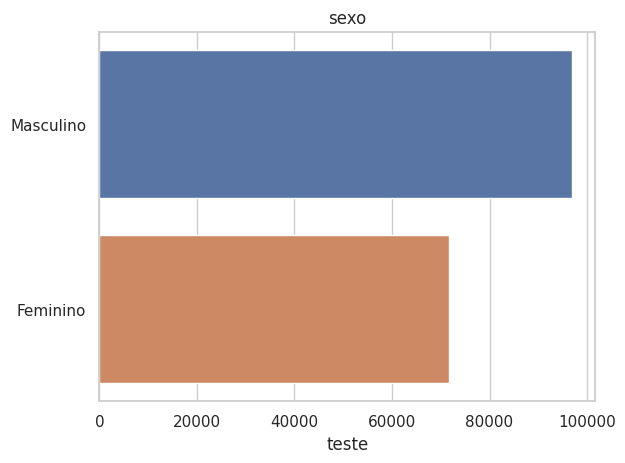

In [9]:
sn.countplot(y=df.V0302)  # gráfico barra - frequência da coluna indicada no eixo y countplot faz a contagem dos dados das colunas especificadas
plt.title("sexo")  # título do gráfico

plt.ylabel('')  # nome do eixo y (aqui especifica que nao quer nada escrito)
plt.xlabel('teste')  # nome do eixo x

plt.show()  # exibir gráfico


Colunas

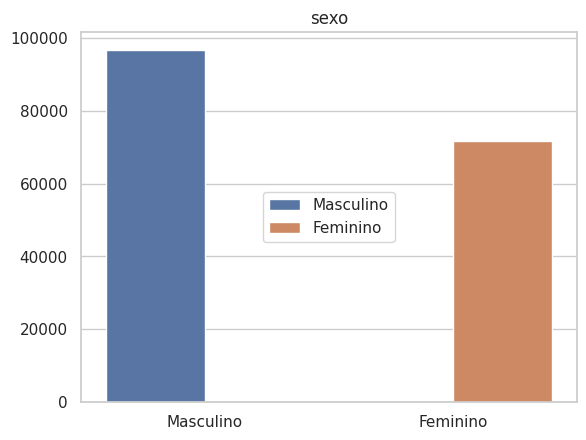

In [14]:
sn.countplot(x=df.V0302, hue=df.V0302)  # gráfico coluna - frequência da coluna indicada no eixo x - com legenda
plt.title("sexo")  # título do gráfico
plt.ylabel('')  # nome do eixo y
plt.xlabel('')  # nome do eixo x

plt.legend(loc="center")   # posição da legenda

plt.show()  # exibir gráfico


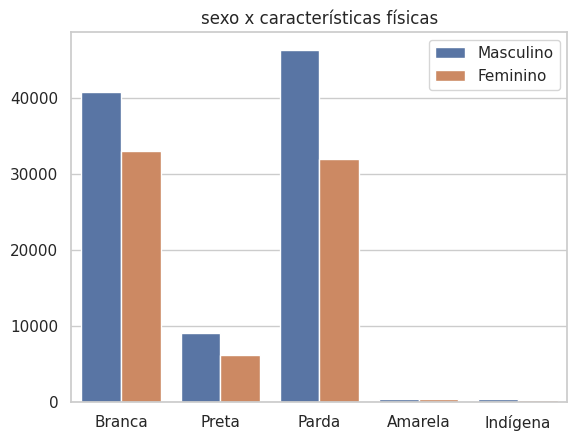

In [13]:
sn.countplot(x=df.V0404, hue=df.V0302)  # gráfico coluna agrupada - frequência da coluna indicada no eixo x - (hue)com legenda
plt.title("sexo x características físicas")  # título do gráfico
plt.ylabel('')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.legend(loc="best")   # posição da legenda
plt.show()  # exibir gráfico


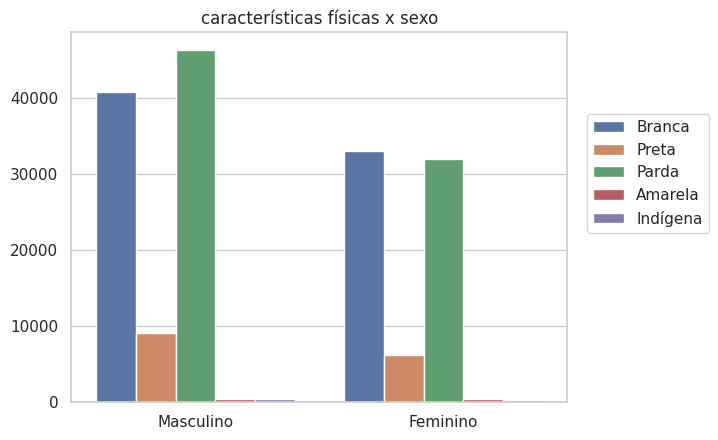

In [16]:
sn.countplot(x=df.V0302, hue=df.V0404)  # gráfico coluna agrupada - frequência da coluna indicada no eixo x - com legenda
plt.title("características físicas x sexo")  # título do gráfico
plt.ylabel('')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.legend(loc="best")   # posição da legenda

plt.legend(bbox_to_anchor=(1.3,0.8))  # posição específica da legenda, para corrigir a legenda bbox (x,y)

plt.show()  # exibir gráfico

Grafico de Setores

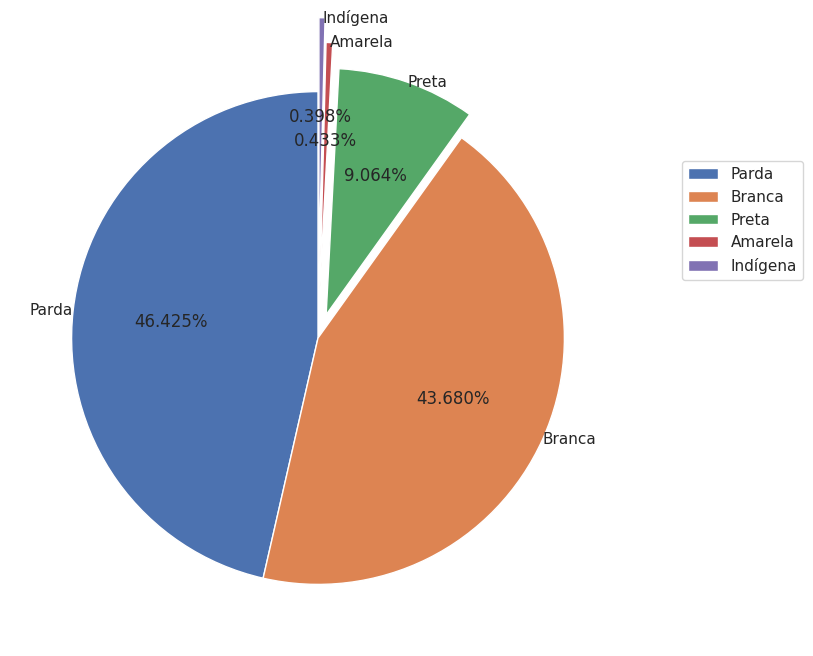

In [18]:
sizes = df.V0404.value_counts()  # tamanho das fatias
rotulo = df['V0404'].value_counts().index   # rótulos das fatias
plt.figure(figsize=(8,8))  # posiçao e tamanho do gráfico

plt.pie(sizes, labels=rotulo, explode=(0,0,0.1,0.2,0.3), autopct='%1.3f%%', labeldistance=1, startangle=90)
# gráfico setores - fatias destacadas na ordem - percentual automático 3 casas decimais

plt.legend(bbox_to_anchor=(1.3,0.8))  # posição específica da legenda
plt.show()  # exibir gráfico

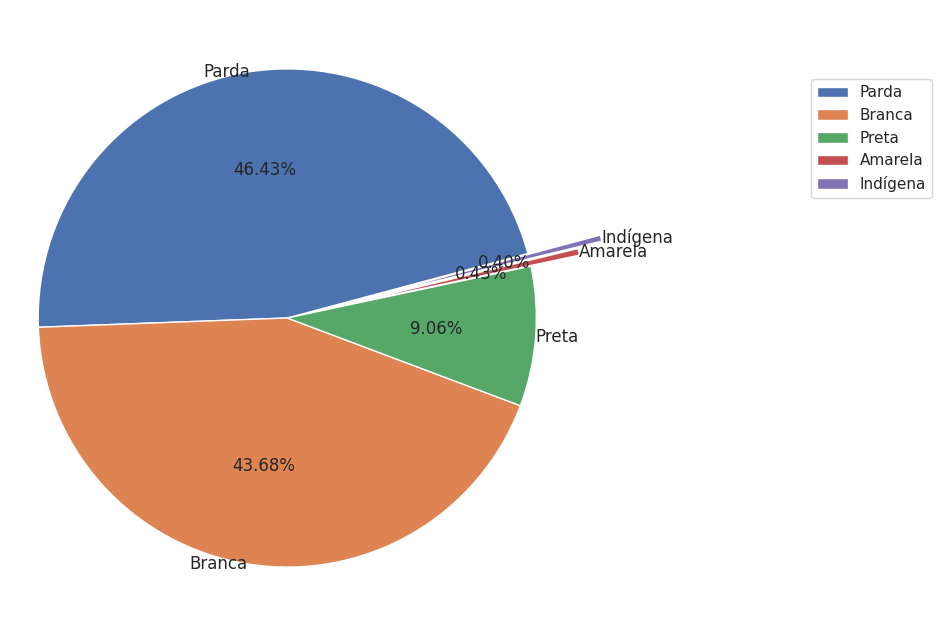

In [22]:
sizes = df['V0404'].value_counts() # tamanho das fatias

sizes.plot(kind='pie', figsize=(8,8), fontsize=12, explode=(0,0,0.1,0.2,0.3), autopct='%1.2f%%', labeldistance=1, startangle=15)
# gráfico setores/ tamanho gráfico e fonte/ fatias destacadas na ordem/ percentual automático 2 casas decimais

plt.axis("equal")  # escala dos eixos igual
plt.ylabel('') # nome do eixo y
plt.legend(bbox_to_anchor=(1.5,0.9)) # posição específica da legenda
plt.show() # exibir gráfico

Frequencia Absoluta

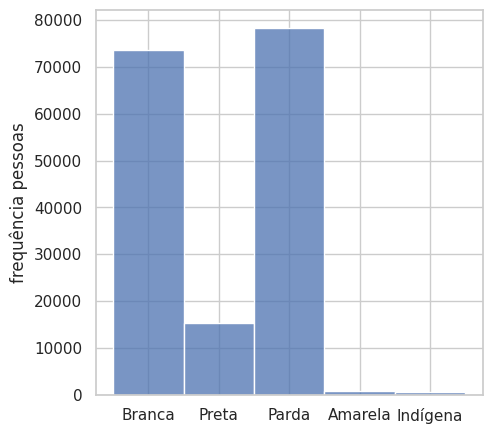

In [28]:
sizes = df.V0404  # coluna analisada
plt.figure(figsize=(5,5))   # tamanho do gráfico

sn.histplot(sizes, bins=5)  # bins: quantidade de intervalos

plt.ylabel('frequência pessoas')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.show()  # exibir gráfico


Frequencia acumulada
*Soma com o anterior*

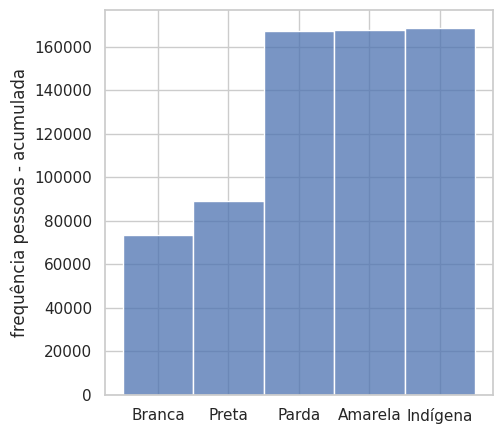

In [24]:
sizes = df.V0404  # coluna analisada
plt.figure(figsize=(5,5))   # tamanho do gráfico

sn.histplot(sizes, bins=5, cumulative=True)  # quantidade de intervalos/ acumulativo

plt.ylabel('frequência pessoas - acumulada')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.show()  # exibir gráfico

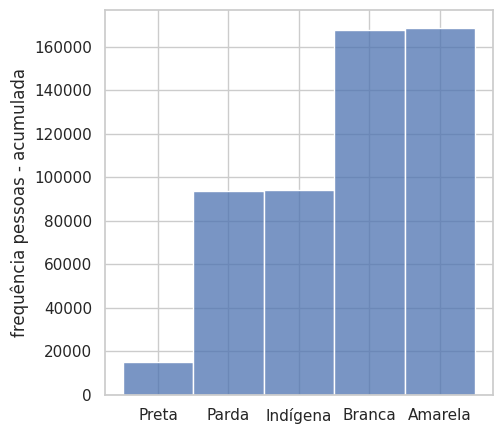

In [25]:
sizes = df.V0404.sort_values(ascending=False)  # coluna analisada ordenada e decrescente
plt.figure(figsize=(5,5))   # tamanho do gráfico

sn.histplot(sizes, bins=5, cumulative=True)  # quantidade de intervalos/ acumulativo

plt.ylabel('frequência pessoas - acumulada')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.show()  # exibir gráfico

Frequencia Relativa

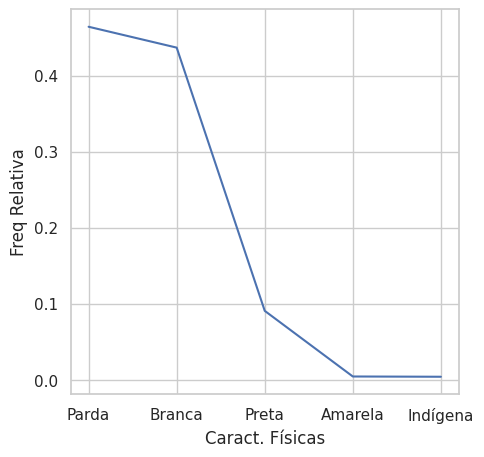

In [26]:
sizes = np.divide(df.V0404.value_counts(), len(df.V0404))  # coluna analisada dividida pelo seu tamanho
plt.figure(figsize=(5,5))  # tamanho do gráfico

plt.plot(sizes) # plotar dados

plt.ylabel('Freq Relativa')  # nome do eixo y
plt.xlabel('Caract. Físicas')  # nome do eixo x
plt.show()  # exibir gráfico